In [1]:
#Import all the necessary packages
import pickle
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import string
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Load the dataset
with open('D:\\USERS\\Downloads\\train_data_text.pkl', 'rb') as file:
    data = pickle.load(file)

print(len(data))

1500


In [3]:
#Print the first 5 datasets
print(data[0:5])

["\nIn article <93089.204431GRV101@psuvm.psu.edu> Callec Dradja <GRV101@psuvm.psu.edu> writes:\n>I am a bit nervous about posting this beacause it is begining to\n>stray fron the topic of space but then again that doesn't seem to\n>stop alot of other people. :-)\n>\n>With all of this talk about breathing at high pressures, I began\n>to think about the movie Abyss. If you remember, in that movie one\n>of the characters dove to great depths by wearing a suit that used\n>a fluid that carries oxegen as opposed to some sort of gas. Now I\n>have heard that mice can breath this fluid but for some reason, humans\n>are unable to. Does anyone know more details about this?\n>\n>Gregson Vaux\n>\n\nI believe the reason is that the lung diaphram gets too tired to pump\nthe liquid in and out and simply stops breathing after 2-3 minutes.\nSo if your in the vehicle ready to go they better not put you on \nhold, or else!! That's about it. Remember a liquid is several more times\nas dense as a gas by its

In [4]:
#Print the type of data
print(type(data))

<class 'list'>


In [5]:
##Preprocessing

In [6]:
# Download required packages
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab', quiet=True)

True

In [7]:
#Cleaning the corpus
def clean_text(text):
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    return text

cleaned_corpus = [clean_text(doc) for doc in data]
print(cleaned_corpus[0])

 in article 93089204431grv101psuvmpsuedu callec dradja grv101psuvmpsuedu writes i am a bit nervous about posting this beacause it is begining to stray fron the topic of space but then again that doesnt seem to stop alot of other people   with all of this talk about breathing at high pressures i began to think about the movie abyss if you remember in that movie one of the characters dove to great depths by wearing a suit that used a fluid that carries oxegen as opposed to some sort of gas now i have heard that mice can breath this fluid but for some reason humans are unable to does anyone know more details about this  gregson vaux   i believe the reason is that the lung diaphram gets too tired to pump the liquid in and out and simply stops breathing after 23 minutes so if your in the vehicle ready to go they better not put you on  hold or else thats about it remember a liquid is several more times as dense as a gas by its very nature 10 i think depending on the gas and liquid comparisio

In [14]:
#Tokenization
tokenized_corpus = [word_tokenize(doc) for doc in cleaned_corpus]
print(tokenized_corpus[0])

['in', 'article', '93089204431grv101psuvmpsuedu', 'callec', 'dradja', 'grv101psuvmpsuedu', 'writes', 'i', 'am', 'a', 'bit', 'nervous', 'about', 'posting', 'this', 'beacause', 'it', 'is', 'begining', 'to', 'stray', 'fron', 'the', 'topic', 'of', 'space', 'but', 'then', 'again', 'that', 'doesnt', 'seem', 'to', 'stop', 'alot', 'of', 'other', 'people', 'with', 'all', 'of', 'this', 'talk', 'about', 'breathing', 'at', 'high', 'pressures', 'i', 'began', 'to', 'think', 'about', 'the', 'movie', 'abyss', 'if', 'you', 'remember', 'in', 'that', 'movie', 'one', 'of', 'the', 'characters', 'dove', 'to', 'great', 'depths', 'by', 'wearing', 'a', 'suit', 'that', 'used', 'a', 'fluid', 'that', 'carries', 'oxegen', 'as', 'opposed', 'to', 'some', 'sort', 'of', 'gas', 'now', 'i', 'have', 'heard', 'that', 'mice', 'can', 'breath', 'this', 'fluid', 'but', 'for', 'some', 'reason', 'humans', 'are', 'unable', 'to', 'does', 'anyone', 'know', 'more', 'details', 'about', 'this', 'gregson', 'vaux', 'i', 'believe', 'the

In [16]:
#Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_corpus = [[word for word in doc if word not in stop_words] for doc in tokenized_corpus]
print(filtered_corpus[0])

['article', '93089204431grv101psuvmpsuedu', 'callec', 'dradja', 'grv101psuvmpsuedu', 'writes', 'bit', 'nervous', 'posting', 'beacause', 'begining', 'stray', 'fron', 'topic', 'space', 'doesnt', 'seem', 'stop', 'alot', 'people', 'talk', 'breathing', 'high', 'pressures', 'began', 'think', 'movie', 'abyss', 'remember', 'movie', 'one', 'characters', 'dove', 'great', 'depths', 'wearing', 'suit', 'used', 'fluid', 'carries', 'oxegen', 'opposed', 'sort', 'gas', 'heard', 'mice', 'breath', 'fluid', 'reason', 'humans', 'unable', 'anyone', 'know', 'details', 'gregson', 'vaux', 'believe', 'reason', 'lung', 'diaphram', 'gets', 'tired', 'pump', 'liquid', 'simply', 'stops', 'breathing', '23', 'minutes', 'vehicle', 'ready', 'go', 'better', 'put', 'hold', 'else', 'thats', 'remember', 'liquid', 'several', 'times', 'dense', 'gas', 'nature', '10', 'think', 'depending', 'gas', 'liquid', 'comparision', 'course', 'acurist']


In [17]:
#Stemming and Lemmatization

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_corpus = [[stemmer.stem(word) for word in doc] for doc in filtered_corpus]
lemmatized_corpus = [[lemmatizer.lemmatize(word) for word in doc] for doc in filtered_corpus]
print("Stemming process on filtered corpus:", stemmed_corpus[0])
print("Lemmatization process on filtered corpus:", lemmatized_corpus[0])

Stemming process on filtered corpus: ['articl', '93089204431grv101psuvmpsuedu', 'callec', 'dradja', 'grv101psuvmpsuedu', 'write', 'bit', 'nervou', 'post', 'beacaus', 'begin', 'stray', 'fron', 'topic', 'space', 'doesnt', 'seem', 'stop', 'alot', 'peopl', 'talk', 'breath', 'high', 'pressur', 'began', 'think', 'movi', 'abyss', 'rememb', 'movi', 'one', 'charact', 'dove', 'great', 'depth', 'wear', 'suit', 'use', 'fluid', 'carri', 'oxegen', 'oppos', 'sort', 'ga', 'heard', 'mice', 'breath', 'fluid', 'reason', 'human', 'unabl', 'anyon', 'know', 'detail', 'gregson', 'vaux', 'believ', 'reason', 'lung', 'diaphram', 'get', 'tire', 'pump', 'liquid', 'simpli', 'stop', 'breath', '23', 'minut', 'vehicl', 'readi', 'go', 'better', 'put', 'hold', 'els', 'that', 'rememb', 'liquid', 'sever', 'time', 'dens', 'ga', 'natur', '10', 'think', 'depend', 'ga', 'liquid', 'comparis', 'cours', 'acurist']
Lemmatization process on filtered corpus: ['article', '93089204431grv101psuvmpsuedu', 'callec', 'dradja', 'grv101ps

"""
Vectorization 1. Word2Vec - CBOW method
"""

In [21]:
#Building the vectorization model - CBOW 
model1 = gensim.models.Word2Vec(lemmatized_corpus, min_count=1, vector_size=100, window=5)
print(model1)
print(model1.wv)

Word2Vec<vocab=27329, vector_size=100, alpha=0.025>
KeyedVectors<vector_size=100, 27329 keys>


In [22]:
#Example: Vectors of the word 'Topic'
print(model1.wv['topic'])

[-1.74876168e-01  1.75229982e-01  7.93571621e-02  4.02741171e-02
 -1.54972542e-02 -3.91461849e-01  1.07165940e-01  4.08116192e-01
 -6.23813383e-02 -1.39915869e-01 -1.25793442e-01 -3.41953099e-01
 -7.45811686e-02  9.54233184e-02  2.72590462e-02 -2.53664196e-01
  3.70814241e-02 -2.12402359e-01  4.06289473e-02 -4.16585684e-01
  1.23729050e-01  1.12691246e-01  1.86281666e-01 -9.99632776e-02
 -1.65621508e-02 -1.57582108e-02 -1.51466697e-01 -2.91513931e-02
 -1.86286852e-01 -2.45768614e-02  2.36792088e-01  7.29279220e-02
  2.34528854e-02 -1.30105004e-01 -2.66251769e-02  1.93790659e-01
  2.59909164e-02 -1.90987304e-01 -1.10322200e-01 -3.45066845e-01
  5.19893989e-02 -2.62897402e-01 -9.91003364e-02  1.42633826e-01
  1.71147853e-01 -8.30044821e-02 -1.45938680e-01  5.52392285e-03
  1.06595941e-01  8.61769244e-02  1.14454664e-01 -2.03451246e-01
 -7.95499086e-02 -1.01131618e-01 -1.52366042e-01  9.37512815e-02
  1.22265093e-01  2.11467557e-02 -1.98078871e-01  2.03362722e-02
  9.28280950e-02  1.18813

In [23]:
#Similarity between the words
print("CBOW model - similarity")
print("Similarity between the words - 'gas' and 'liquid':", model1.wv.similarity('gas', 'liquid'))
print("Similarity between the words - 'dove' and 'depth':", model1.wv.similarity('dove', 'depth'))
print("Similarity between the words - '93089204431grv101psuvmpsuedu' and 'dove': ",model1.wv.similarity('93089204431grv101psuvmpsuedu', 'dove'))

CBOW model - similarity
Similarity between the words - 'gas' and 'liquid': 0.99925923
Similarity between the words - 'dove' and 'depth': 0.6899873
Similarity between the words - '93089204431grv101psuvmpsuedu' and 'dove':  0.37613952


"""
Vectorization 
2. Word2Vec - Skip gram method
"""

In [25]:
#Building the vectorization model - Skip gram
model2 = gensim.models.Word2Vec(lemmatized_corpus, min_count=1, vector_size=100, window=5, sg=1)
print(model2)
print(model2.wv)

Word2Vec<vocab=27329, vector_size=100, alpha=0.025>
KeyedVectors<vector_size=100, 27329 keys>


In [26]:
#Example: Vectors of the word 'Human'
print(model2.wv['human'])

[-0.44069287  0.00838216  0.08426921 -0.01631347 -0.13780618 -0.6735829
 -0.06643409  0.36746684 -0.2158862   0.0301612  -0.18965583 -0.41181305
 -0.15232195  0.01201288 -0.01311107 -0.5234665  -0.04453444 -0.23119819
  0.15895888 -0.5859199   0.18997045  0.23852442  0.33198208 -0.08964331
 -0.01501398  0.24725741 -0.27357152 -0.11838771 -0.31474158 -0.3498593
  0.2147931   0.18553114  0.25128022 -0.14036521 -0.2255554   0.07837081
  0.05916196 -0.17045562 -0.15062575 -0.39360276 -0.07363287 -0.3438973
 -0.3138735   0.24674068  0.28761855 -0.31847912 -0.14332917  0.05085276
  0.40071648  0.09725608  0.13229778 -0.03123078  0.06617404 -0.15239714
 -0.28154698  0.0083369   0.12545417 -0.04692422 -0.17958644  0.00999005
  0.5769561  -0.10158193  0.02713017  0.23692822 -0.24847741  0.14486548
 -0.1413598   0.11846399 -0.25422356  0.34283805 -0.13177033  0.28614232
  0.21307714 -0.1780505   0.40902144  0.38089526  0.14179432 -0.02682268
 -0.3090728   0.08579322 -0.25245985 -0.2281953  -0.44

In [27]:
#Similarity between the words
print("Skip gram model - similarity")
print("Similarity between the words - 'gas' and 'liquid':", model2.wv.similarity('gas', 'liquid'))
print("Similarity between the words - 'dove' and 'depth':", model2.wv.similarity('dove', 'depth'))
print("Similarity between the words - '93089204431grv101psuvmpsuedu' and 'dove': ",model2.wv.similarity('93089204431grv101psuvmpsuedu', 'dove'))

Skip gram model - similarity
Similarity between the words - 'gas' and 'liquid': 0.954949
Similarity between the words - 'dove' and 'depth': 0.94804716
Similarity between the words - '93089204431grv101psuvmpsuedu' and 'dove':  0.95492417


CBOW method provides accurate similarity between the words compared to skip gram method.

In [29]:
#TF_IDF vectorization

In [30]:
#Step 1:To perform TF-IDF function we want the entire paragraph. 
corpus_as_text = [' '.join(doc) for doc in lemmatized_corpus]

# Step 2: Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Step 3: Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(corpus_as_text)

In [31]:
print(tfidf_matrix)

  (0, 4496)	0.028617571814403053
  (0, 3074)	0.1360184599579217
  (0, 6286)	0.1360184599579217
  (0, 9496)	0.1360184599579217
  (0, 12320)	0.1360184599579217
  (0, 26984)	0.02672183751299093
  (0, 5426)	0.06264569593660291
  (0, 17576)	0.12878153256022798
  (0, 19595)	0.07281779229551809
  (0, 5112)	0.1360184599579217
  (0, 5179)	0.1360184599579217
  (0, 23759)	0.12878153256022798
  (0, 11547)	0.1360184599579217
  (0, 24990)	0.09023806626308749
  (0, 23184)	0.06031731289383853
  (0, 9382)	0.05956304041624305
  (0, 22240)	0.06973692081825011
  (0, 23717)	0.1386136333090635
  (0, 3878)	0.0958363703730585
  (0, 18989)	0.04222680984170775
  (0, 24334)	0.07561230877126748
  (0, 5769)	0.23932816461656403
  (0, 12881)	0.061512079512399724
  (0, 19784)	0.08768393670849212
  (0, 5174)	0.10128696225432166
  :	:
  (1499, 19132)	0.13185112987501482
  (1499, 4229)	0.10810817616412945
  (1499, 295)	0.24503271772177182
  (1499, 18981)	0.12659405946533306
  (1499, 19613)	0.13185112987501482
  (1499, 2

In [32]:
#Check the cosine similarity of the TF-IDF model
sim_tfidf_1_2 = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
sim_tfidf_1_3 = cosine_similarity(tfidf_matrix[0], tfidf_matrix[2])[0][0]

print("TF-IDF Cosine Similarity (doc1 vs doc2):", sim_tfidf_1_2)
print("TF-IDF Cosine Similarity (doc1 vs doc3):", sim_tfidf_1_3)


TF-IDF Cosine Similarity (doc1 vs doc2): 0.028368883103478397
TF-IDF Cosine Similarity (doc1 vs doc3): 0.006275109880730736


In [33]:
#Check the cosine similarity of the word2vec - CBOW model
def average_vector(doc, model):
    vectors = [model.wv[word] for word in doc if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Get vectors
vec1 = average_vector(lemmatized_corpus[0], model1)
vec2 = average_vector(lemmatized_corpus[1], model1)
vec3 = average_vector(lemmatized_corpus[2], model1)

# Cosine similarities
sim_w2v_1_2 = cosine_similarity([vec1], [vec2])[0][0]
sim_w2v_1_3 = cosine_similarity([vec1], [vec3])[0][0]

print("Word2Vec Cosine Similarity (doc1 vs doc2):", sim_w2v_1_2)
print("Word2Vec Cosine Similarity (doc1 vs doc3):", sim_w2v_1_3)


Word2Vec Cosine Similarity (doc1 vs doc2): 0.99984676
Word2Vec Cosine Similarity (doc1 vs doc3): 0.99947166


In [34]:
#Clustering

In [35]:
#Fit the clustering model
def get_document_vectors_and_clusters(model, tokenized_docs, n_clusters=5):
    doc_vectors = []
    for doc in tokenized_docs:
        doc_words = [word for word in doc if word in model.wv.key_to_index]
        if doc_words:
            doc_vector = np.mean([model.wv[word] for word in doc_words], axis=0)
        else:
            doc_vector = np.zeros(model.vector_size)
        doc_vectors.append(doc_vector)
    doc_vectors = np.array(doc_vectors)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(doc_vectors)#labelling

    return doc_vectors, cluster_labels, kmeans


doc_vectors, labels, kmeans = get_document_vectors_and_clusters(model1, lemmatized_corpus)

In [36]:
#Check the output of Kmeans model
get_document_vectors_and_clusters(model1, lemmatized_corpus)

(array([[-0.40574616,  0.37618583,  0.18294261, ..., -0.5067828 ,
          0.07892466,  0.00801838],
        [-0.4888818 ,  0.45326674,  0.21864977, ..., -0.6046368 ,
          0.08436724,  0.00676269],
        [-0.35489768,  0.3272428 ,  0.15652211, ..., -0.44396335,
          0.07455251,  0.00582705],
        ...,
        [-0.37098742,  0.36052284,  0.16512336, ..., -0.47553685,
          0.06816638,  0.00357608],
        [-0.32820672,  0.3099979 ,  0.14512219, ..., -0.41981563,
          0.06699782,  0.00316973],
        [-0.33707377,  0.32430336,  0.15394375, ..., -0.42811856,
          0.05290424,  0.00367874]], dtype=float32),
 array([0, 2, 0, ..., 0, 1, 1]),
 KMeans(n_clusters=5, random_state=42))

In [37]:
#Print the results using Dataframe
results = pd.DataFrame()
results['document'] = data
results['cluster'] = labels


print(results[:10])

                                            document  cluster
0  \nIn article <93089.204431GRV101@psuvm.psu.edu...        0
1  \nIn article <1993Apr19.131102.7843@rchland.ib...        2
2  \nYou can get a *little* UV by putting a heavy...        0
3  NNTP-Posting-Host: access.digex.net\n\nThe tro...        1
4  \n\n\nI understand that the new GPS boxes now ...        1
5  Distribution: world\nNNTP-Posting-Host: kelvin...        0
6  Nntp-Posting-Host: 144.124.112.30\n\n\nIn arti...        2
7  \nCharles Parr, on the Tue, 20 Apr 93 21:25:10...        1
8  Reply-To: an030@cleveland.Freenet.Edu (Broward...        4
9  \nIn article <15413@optilink.COM> cramer@optil...        0


In [38]:
#Reduce document vectors to 2D with PCA and plot KMeans clusters.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_clusters(doc_vectors, cluster_labels, n_clusters):
    # Reduce to 2 dimensions using PCA
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(doc_vectors)

    # Plot each cluster
    plt.figure(figsize=(10, 8))
    for i in range(n_clusters):
        cluster_points = reduced_vectors[cluster_labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}", alpha=0.6)

    plt.title("KMeans Clustering of Documents (PCA Reduced)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

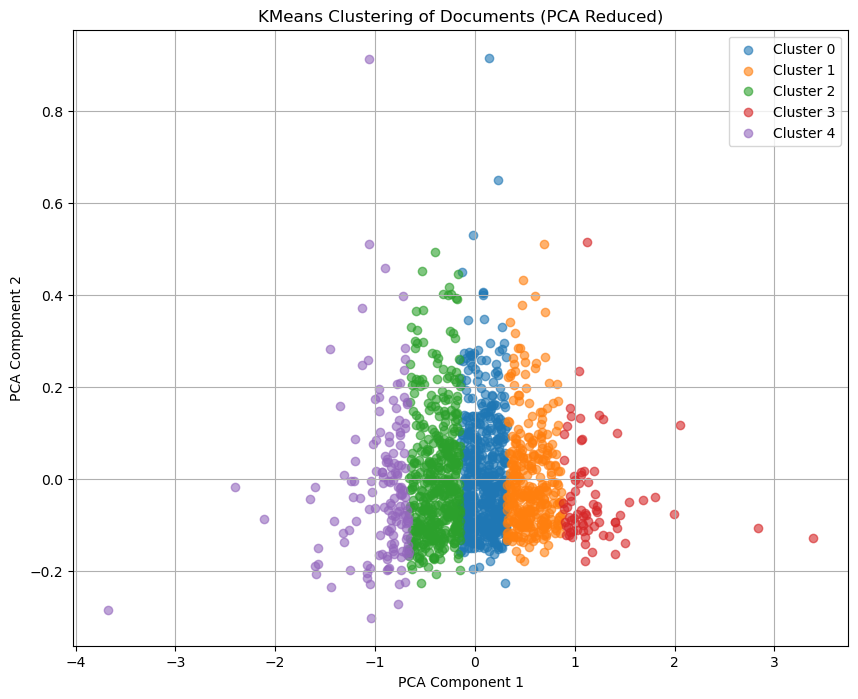

In [39]:
visualize_clusters(doc_vectors, labels, n_clusters=5)

In [51]:
#Classification

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, labels, test_size=0.2, random_state=42)

In [55]:
# Train the Logistic Regression model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

In [68]:
#Evaluate the results of Logistic Regression model using Confusion matix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[101   0   0   0   0]
 [  2  51   0   0   0]
 [  0   0  88   0   0]
 [  0  15   0   6   0]
 [  0   0   8   0  29]]


In [70]:
#Evaluate the results of Logistic Regression model using Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       101
           1       0.77      0.96      0.86        53
           2       0.92      1.00      0.96        88
           3       1.00      0.29      0.44        21
           4       1.00      0.78      0.88        37

    accuracy                           0.92       300
   macro avg       0.93      0.81      0.83       300
weighted avg       0.93      0.92      0.90       300



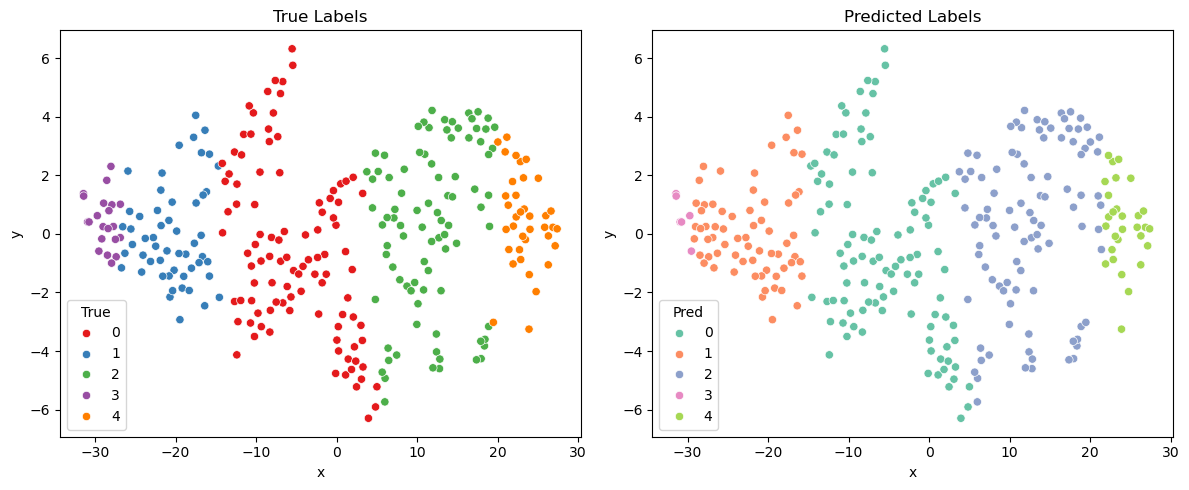

In [72]:
#Visualize the prediction of Logistic regression model
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test)

df = pd.DataFrame(X_embedded, columns=['x', 'y'])
df['True'] = y_test
df['Pred'] = y_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='x', y='y', hue='True', palette='Set1')
plt.title('True Labels')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='x', y='y', hue='Pred', palette='Set2')
plt.title('Predicted Labels')

plt.tight_layout()
plt.show()


In [90]:
#KNN model 
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [92]:
#Evaluate the results of KNN model using Confusion matix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[100   1   0   0   0]
 [  1  52   0   0   0]
 [  0   0  88   0   0]
 [  0   2   0  19   0]
 [  0   0   1   0  36]]


In [94]:
#Evaluate the results of KNN model using Classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       101
           1       0.95      0.98      0.96        53
           2       0.99      1.00      0.99        88
           3       1.00      0.90      0.95        21
           4       1.00      0.97      0.99        37

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300



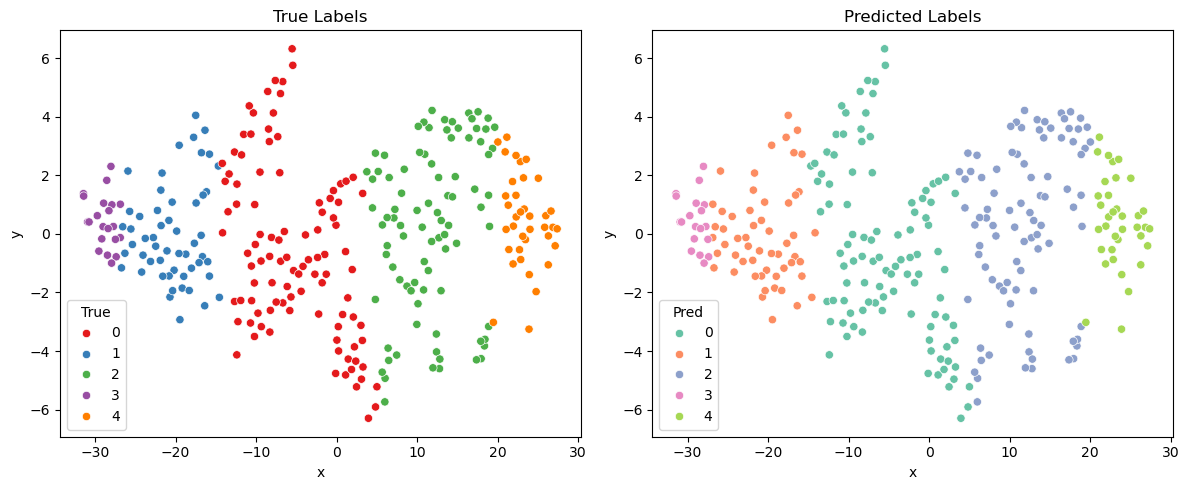

In [96]:
#Visualize the prediction of KNN model
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test)

df = pd.DataFrame(X_embedded, columns=['x', 'y'])
df['True'] = y_test
df['Pred'] = y_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='x', y='y', hue='True', palette='Set1')
plt.title('True Labels')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='x', y='y', hue='Pred', palette='Set2')
plt.title('Predicted Labels')

plt.tight_layout()
plt.show()


In [98]:
#Random forest model
model_RF = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
y_pred_int = np.round(y_pred).astype(int)#Convert to integer type because RF model gives us float values
print(y_pred)
print(y_pred_int)

[0.  1.  1.  0.  2.  4.  2.  0.  2.  4.  1.  0.  2.  2.  0.  2.  4.  0.
 1.  0.  0.  2.  1.  1.2 0.  1.  2.  3.8 0.  0.  0.  0.  2.  0.  0.  3.
 1.  0.  2.  2.  3.  4.  4.  1.  1.  1.  0.  2.  0.  2.  2.  0.  1.  2.
 1.  4.  0.  0.  2.  1.  0.  2.  0.  2.  1.  1.8 1.  2.  4.  0.  0.  1.
 4.  0.4 0.  0.  0.  2.  2.  2.  0.  4.  0.  1.  3.  4.  4.  1.  4.  1.
 3.  0.  0.  3.4 2.4 4.  0.9 0.  0.  0.  2.  0.  2.  0.  2.  0.2 3.  1.
 1.  1.  2.  1.6 2.  0.  4.  4.  0.6 2.  2.6 4.  0.  2.  2.  4.  0.  1.
 1.  4.  0.  0.  1.  0.  1.  4.  2.  2.  0.4 0.  0.  1.  0.8 3.  1.  1.
 2.  4.  2.  2.  1.  1.  1.  4.  2.  0.  0.  3.  0.  2.  0.  0.  4.  1.
 1.  2.  2.  0.  0.  1.  2.  0.  0.  2.  4.  1.  1.6 0.  0.  0.  0.4 2.
 4.  1.4 2.  1.  2.  1.  0.9 2.  2.  0.  1.  2.  2.  0.  3.  2.  0.  2.
 2.  1.  3.  2.  4.  2.  0.  0.  0.  0.  3.  4.  2.  2.  0.  4.  4.  4.
 3.  2.  1.  2.  0.  2.  0.  2.  0.6 0.  2.  3.  1.  0.  1.  4.  2.  0.
 0.  4.  0.  1.  0.  1.  1.  2.  2.  2.  0.  0.  2.  0.  3.  0.4

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [102]:
#Evaluate the results of Random forest model using Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_int)
print(conf_matrix)

[[96  5  0  0  0]
 [ 0 53  0  0  0]
 [ 0  0 86  1  1]
 [ 0  0  2 19  0]
 [ 0  0  0  0 37]]


In [104]:
#Evaluate the results of Random forest model using Classification report
class_report = classification_report(y_test, y_pred_int)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       101
           1       0.91      1.00      0.95        53
           2       0.98      0.98      0.98        88
           3       0.95      0.90      0.93        21
           4       0.97      1.00      0.99        37

    accuracy                           0.97       300
   macro avg       0.96      0.97      0.96       300
weighted avg       0.97      0.97      0.97       300



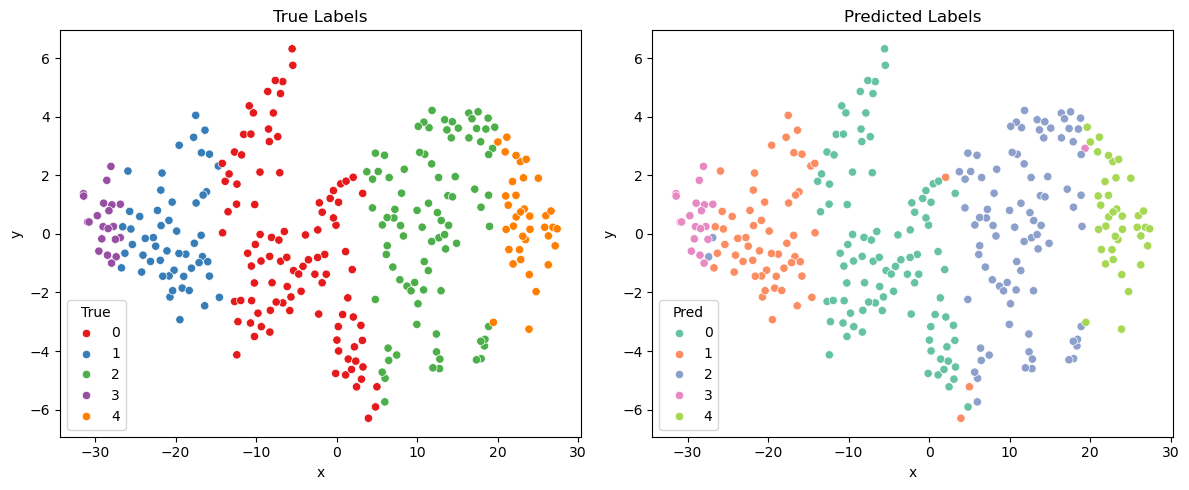

In [106]:
#Visualize the prediction of Random forest model
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test)

df = pd.DataFrame(X_embedded, columns=['x', 'y'])
df['True'] = y_test
df['Pred'] = y_pred_int

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='x', y='y', hue='True', palette='Set1')
plt.title('True Labels')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='x', y='y', hue='Pred', palette='Set2')
plt.title('Predicted Labels')

plt.tight_layout()
plt.show()
